<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.1.- Data Cleansing - Basic</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

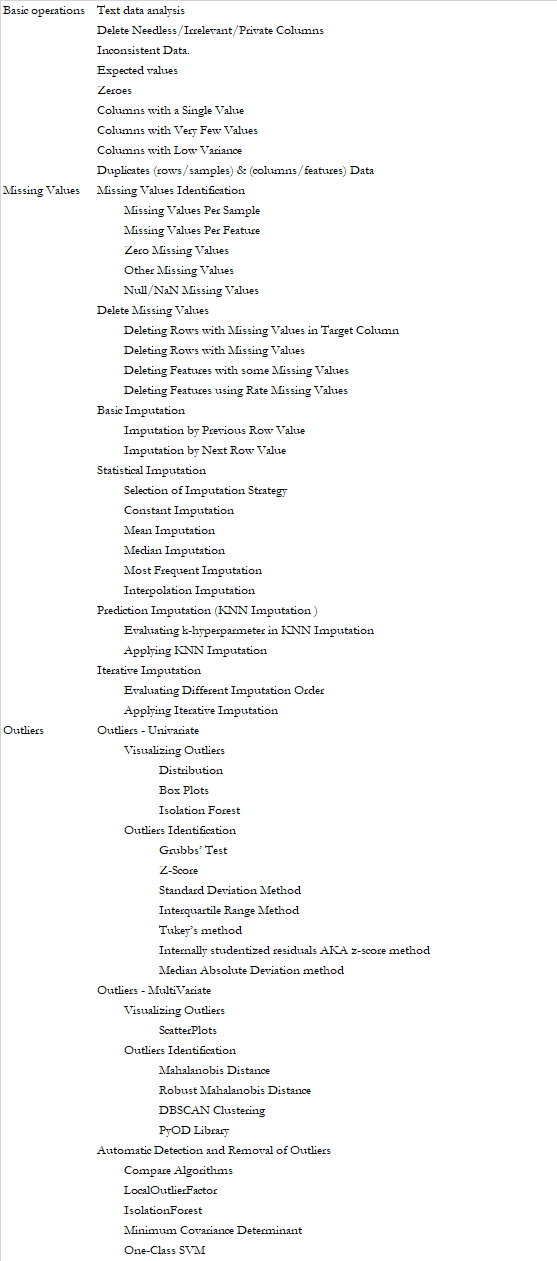


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

## <font color='green'>Settings</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [35]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

### Libraries to use

In [37]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)

### Paths

In [38]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [ ]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [39]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [66]:
data <- read_csv(file_data)


Rows: 21736 Columns: 48
── Column specification ───────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (44): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [67]:
data |> glimpse()

Rows: 21,736
Columns: 48
$ GEOCODIGO         <chr> "097", "128", "155", "085", "049", "254", "264", "27…
$ DESBDT            <chr> "Galapagar", "La Ribota", "Majadahonda", "Ensanche V…
$ ano               <dbl> 2022, 2021, 2022, 2021, 2022, 2022, 2022, 2023, 2022…
$ semana            <dbl> 33, 47, 39, 46, 24, 5, 38, 1, 26, 2, 47, 18, 23, 5, …
$ n_vacunas         <dbl> 0, 451, 0, 813, 0, 250, 0, 144, 0, 282, 166, 0, 0, 1…
$ n_citas           <dbl> 0, 437, 0, 789, 0, 235, 0, 137, 0, 271, 159, 0, 0, 1…
$ tmed              <dbl> 21.768536, 6.039860, 15.436997, 9.887983, 21.108264,…
$ prec              <dbl> 0.0550769418, 1.2404689012, 0.6913641020, 0.07183897…
$ velmedia          <dbl> 2.4482484, 2.7974515, 2.7535661, 2.5478336, 3.956291…
$ presMax           <dbl> 901.1438, 936.6692, 926.6612, 952.3018, 833.8937, 89…
$ benzene           <dbl> 0.1795784, 0.3697754, 0.2254214, 0.4194085, 0.195865…
$ co                <dbl> 0.4692918, 0.3468722, 0.4797698, 0.2673996, 0.331213…
$ no           

Muestra de los primeros datos:

In [65]:
data |> slice_head(n = 5)

1
2
3
4
5

## Text data analysis

<font color='tomato'>Select columns</font>

In [44]:
# Select column
text_columns <- sapply(data, is.character)

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Analizar datos de texto y verificar su corrección
# e.g. faltas ortografía, etc

In [45]:
# pasar a mayúsculas todas las columnas de texto
data[, text_columns] <- lapply(data[, text_columns], function(x) toupper(x))

## Delete Columns Needless/Irrelevant/Private

<font color='tomato'>Select columns</font>

In [ ]:
# Select columns


<font color='darkgrey'><b>Operation</font>

In [ ]:
# Eliminamos columnas que consideramos irrelevantes o innecesarias


Todas las columnas son relevantes, por lo que no aplica.


## Inconsistent Data 

<font color='tomato'>Select columns and value</font>

In [47]:
# Select column and value
# e.g. age > 100
numeric_columns <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

In [69]:
# Inconsistent data is unique to each data set and 
# must be searched manually
data[, numeric_columns] <- lapply(data[, numeric_columns], function(x) {
  ifelse(is.na(x), ifelse(is.integer(x), as.integer(mean(x, na.rm = TRUE)), mean(x, na.rm = TRUE)), x)
})

data <- data[!(data$ano < 2020 | data$ano > 2024), ]
data <- data[!(data$semana < 0 | data$semana > 53), ]

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t8_1,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
097,Galapagar,2022,33,0,0,21.768536,0.0550769418,2.4482484,901.1438,⋯,0.05728152,0.4408272,0.12371972,0.5291455,0.6040733,96647460.4,455.95611,34,11,TRUE
128,La Ribota,2021,47,451,437,6.039860,1.2404689012,2.7974515,936.6692,⋯,0.03935768,0.4406703,0.11272335,0.6094153,0.6814646,1364369.5,24969.77491,280,64,TRUE
155,Majadahonda,2022,39,0,0,15.436997,0.6913641020,2.7535661,926.6612,⋯,0.06703038,0.5570257,0.08802468,0.5018791,0.5505073,30837796.0,1658.48428,126,42,TRUE
085,Ensanche Vallecas,2021,46,813,789,9.887983,0.0718389796,2.5478336,952.3018,⋯,0.03454148,0.4603761,0.13945576,0.6560315,0.7524379,48678625.6,1284.54736,206,64,TRUE
049,Cercedilla,2022,24,0,0,21.108264,0.2536833999,3.9562916,833.8937,⋯,0.04512388,0.3870251,0.11970174,0.5154004,0.5852285,87516365.5,173.06477,46,21,TRUE
254,Soto del Real,2022,5,250,235,10.309957,0.0000000000,2.2369815,897.7111,⋯,0.04256264,0.4121386,0.12637167,0.5257095,0.6021417,228083251.7,116.41363,144,20,TRUE
264,Valdemoro,2022,38,0,0,21.957532,0.6649106368,2.1870542,956.6608,⋯,0.03517429,0.3330335,0.13116084,0.5908541,0.6767620,36608304.5,1181.89030,98,32,TRUE
273,Vicálvaro - Villablanca,2023,1,144,137,7.300794,1.3445716186,2.1130459,959.9109,⋯,0.02879346,0.2265070,0.16633262,0.4770070,0.5715152,16274391.9,828.47950,24,64,TRUE
018,Aquitania,2022,26,0,0,24.985718,-0.0061531257,3.0764739,946.5623,⋯,0.03817496,0.2899343,0.15861356,0.4950310,0.5869760,1305256.4,18762.59765,70,20,TRUE


## Expected values

In [53]:
# Check for expected value
nan_counts <- colSums(is.na(data))
nan_counts

GEOCODIGO            DESBDT               ano            semana 
                0               868                 0                 0 
        n_vacunas           n_citas              tmed              prec 
                0                 0                 0                 0 
         velmedia           presMax           benzene                co 
                0                 0                 0                 0 
               no               no2               nox                o3 
                0                 0                 0                 0 
             pm10             pm2.5               so2           campana 
                0                 0                 0                 0 
         scampana    capacidad_zona       prop_riesgo       tasa_riesgo 
                0                 0                 0                 0 
     tasa_mayores poblacion_mayores       nombre_zona              nsec 
                0                 0               564                 0 
             t3_1              t1_1              t2_1              t2_2 
                0                 0                 0                 0 
             t4_1              t4_2              t4_3              t5_1 
                0                 0                 0                 0 
             t6_1              t7_1              t8_1              t9_1 
                0                 0                 0                 0 
            t10_1             t11_1             t12_1              area 
                0                 0                 0                 0 
  densidad_hab_km       tuits_gripe     interes_gripe          is_train 
                0                 0                 0                 0

## Zeros

No aplica. ETL satisface los requisitos de calidad de los datos para valores cero.

## Single Value

In [55]:
# We obtain the number of different values of each column
distinct_counts <- sapply(data, function(x) n_distinct(x, na.rm = TRUE))
distinct_counts

GEOCODIGO            DESBDT               ano            semana 
              286               282                 3                52 
        n_vacunas           n_citas              tmed              prec 
              699               671             21736             19422 
         velmedia           presMax           benzene                co 
            20888             21451             17215             18303 
               no               no2               nox                o3 
            17020             20023             19397             20831 
             pm10             pm2.5               so2           campana 
            16586             19704              9453                 4 
         scampana    capacidad_zona       prop_riesgo       tasa_riesgo 
               23               281               283               283 
     tasa_mayores poblacion_mayores       nombre_zona              nsec 
              283               283               286                37 
             t3_1              t1_1              t2_1              t2_2 
              283               281               283               283 
             t4_1              t4_2              t4_3              t5_1 
              283               283               283               283 
             t6_1              t7_1              t8_1              t9_1 
              283               283               283               283 
            t10_1             t11_1             t12_1              area 
              283               283               283               287 
  densidad_hab_km       tuits_gripe     interes_gripe          is_train 
              283                63                48                 2

In [56]:
# Columns with a single unique value
#
# Identify columns with a single unique value
single_value_columns <- which(distinct_counts == 1)
print(single_value_columns)
# Remove columns with a single unique value
data <- data[, -single_value_columns]
colnames(data)



named integer(0)


character(0)

## Very Few Values

<font color='tomato'>Select rate
</font>

In [61]:
# Select rate
threshold <- 0.8

<font color='darkgrey'><b>Operation</font>

In [62]:
# Show features with over rate rows being the same value
column_modes <- sapply(data, function(x) {
  tab <- table(x)
  names(tab)[tab == max(tab)]
})
names(column_modes[table(column_modes) / length(data) > threshold])

ERROR: Error in table(column_modes): nothing to tabulate


In [64]:
data

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1    
2    
3    
4    
5    
6    
7    
8    
9    
10   
11   
12   
13   
14   
15   
16   
17   
18   
19   
20   
21   
22   
23   
24   
25   
26   
27   
28   
29   
30   
⋮    
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736

In [58]:
# Summarize the number of unique values in each column
# followed by the percentage of unique values for each 
# variable as a percentage of the total number of rows 
# in the dataset.

# Summarize the number of unique values in each column
# followed by the percentage of unique values for each 
# variable as a percentage of the total number of rows 
# in the dataset.

# Calculate the number of unique values per column
unique_counts <- sapply(data, function(x) n_distinct(x, na.rm = TRUE))

# Calculate the percentage of unique values for each variable
percentage_unique <- (unique_counts / nrow(data)) * 100

# Create a summary data frame
summary_df <- data.frame(
  Column = names(unique_counts),
  Unique_Count = unique_counts,
  Percentage_Unique = percentage_unique
)

# Print the summary data frame
print(summary_df)


ERROR: Error in unique_counts/nrow(data): non-numeric argument to binary operator


<font color='tomato'>Select percent of the number of rows</font>

In [ ]:
# Select percent of the number of rows


<font color='darkgrey'><b>Operation</font>

In [ ]:
# Summarize columns that have unique values that are less than 
# "porcentage_threshold" percent of the number of rows.


<font color='tomato'>Select percent of the number of rows</font>

In [ ]:
# Select percent of the number of rows


<font color='darkgrey'><b>Operation</font>

In [ ]:
# Delete columns that have unique values that are less than 
# "porcentage_threshold" percent of the number of rows.
#
# NOTE: WE MUST EXCLUDE TARGET COLUMN TO DELETE



## Low Variance

**A) Calculating variances**

In [59]:
# Calculate variance for all variables
data |> summarise(across(where(is.numeric), var(.)))

ERROR: [1m[33mError[39m in `summarise()`:[22m
[1m[22m[36mℹ[39m In argument: `across(where(is.numeric), var(.))`.
[1mCaused by error in `is.data.frame()`:[22m
[33m![39m object '.' not found


**B) Automatic calculation and representation of variances**

<font color='tomato'>Define thresholds to check</font>

In [ ]:
# define thresholds to check


<font color='darkgrey'><b>Operation</font>

**C) Delete variables with low variance**

<font color='tomato'>Select column</font>

In [ ]:
# Select column


<font color='darkgrey'><b>Operation</font>

In [ ]:
# drop columns with low variance


In [ ]:
# drop columns


## Duplicates

Entendido como ERROR --> Eliminar duplicados

### Identificación de Duplicates

In [ ]:
# Buscamos filas duplicadas


In [ ]:
# Seleccionamos las filas duplicadas


### Eliminación de primera fila duplicada

In [ ]:
# Eliminamos filas duplicadas
# Deja la primera y elimina el resto duplicadas


### Eliminación de todas las filas duplicadas

In [ ]:
# Eliminamos filas duplicadas
# Elimina todas las filas que están duplicadas (no deja una)


### Eliminación de filas duplicadas en columnas concretas

<font color='tomato'>Select columns</font>

In [ ]:
# Select columns


<font color='darkgrey'><b>Operation</font>

In [ ]:
# Eliminamos filas duplicadas
# Elimina las filas que están duplicadas en columnas seleccionadas

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 09.1

In [ ]:
# caso <- "CU_XX"
# proceso <- '_09.1'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [ ]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están limpios para el despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>